# **SVM - Kernel comparison**

## Kernel interpretation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.svm import SVC
from sklearn.datasets import make_gaussian_quantiles

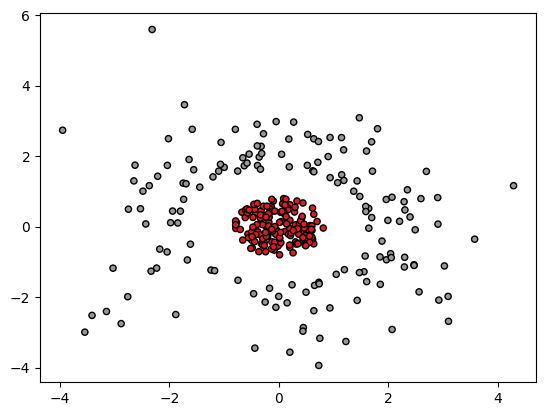

In [17]:
X, y = make_gaussian_quantiles(cov=2,
                                 n_samples = 300 , n_features = 2 ,
                                 n_classes = 2 , random_state = 1)

X[ y == 0, :] = X[ y == 0, :] * 0.5

plt.scatter( X[:,0], X[:,1], c = y, s = 20, edgecolors="k", cmap="Set1")

In [3]:
k = X[:, 0] ** 2 + X[:, 1] ** 2
X = np.c_[X, k]

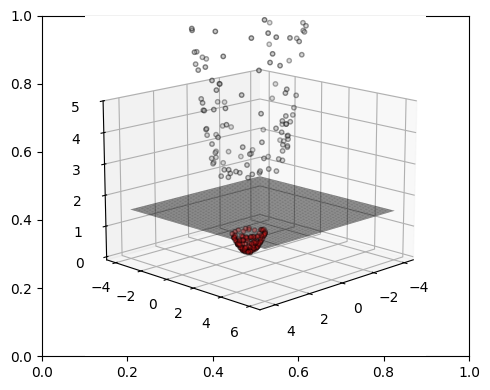

In [4]:
f, _ = plt.subplots(figsize = (5,4))
ax = f.add_subplot(projection='3d')

ax.view_init(15, 45)
ax.scatter3D( X[:, 0] , X[:, 1] , k , c = y , s=10, edgecolors="k", cmap="Set1")

X_grid, y_grid = np.meshgrid(np.linspace(-4, 4, 100), np.linspace(-4, 6, 100))
z_grid = np.ones(X_grid.shape) * 1.5

ax.plot_surface(X_grid, y_grid, z_grid, color="k", alpha=0.5)
ax.set_zlim(-0.1, 5)
plt.tight_layout()

In [5]:
import os

os.makedirs("images", exist_ok=True)

In [6]:
# Sve all figs

for i in range(0,91, 10):
  f, _ = plt.subplots(figsize = (5,4))
  ax = f.add_subplot(projection='3d')
  ax.view_init(i, 45)
  ax.scatter3D( X[:, 0] , X[:, 1] , k , c = y , s=10, edgecolors="k", cmap="Set1")
  ax.plot_surface(X_grid, y_grid, z_grid, color="k", alpha=0.5)
  ax.set_zlim(-0.1, 7)
  plt.tight_layout()
  plt.savefig("images/kernel_{0}.png".format(i))
  plt.close()

In [7]:
import os

all_images = []
for file_ in sorted(os.listdir("images")):
  image = Image.open("images/{0}".format(file_))
  all_images.append(image)

In [8]:
from PIL import Image

# Save a gif

image.save("kernel_.gif", save_all=True, append_images=all_images, duration=200, loop=0)

## SVM

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_classification

In [ ]:
# we create 100 separable points
X, Y = make_classification(n_samples = _ , n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=2, random_state=2)
plt.scatter( _ , _ , c = _ , s = _, cmap=plt.cm.Paired)

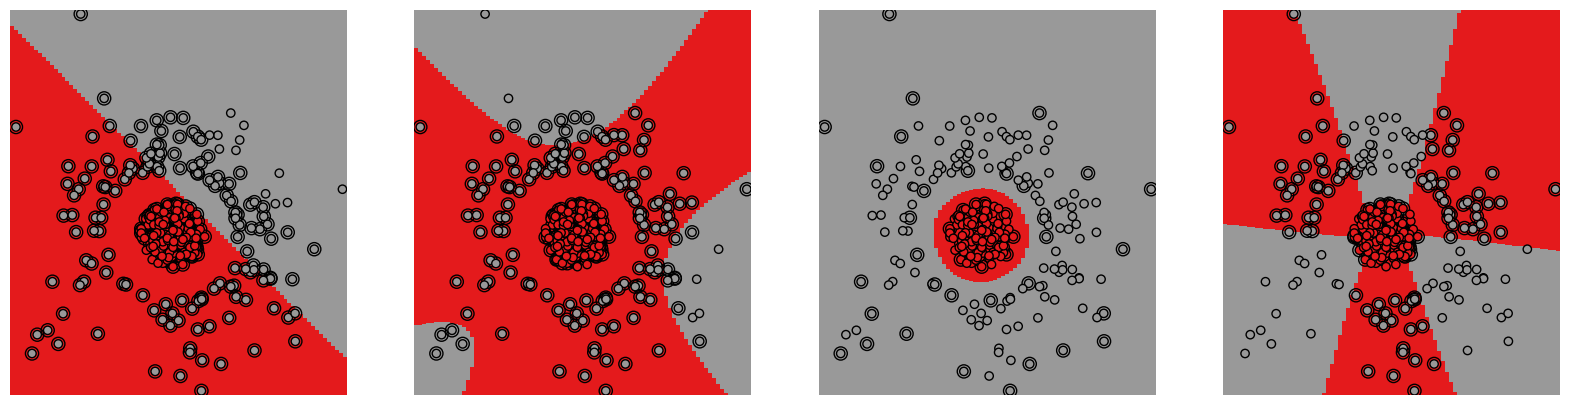

In [18]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

_, axes = plt.subplots(1,4, figsize = (20,5))

# fit the model
for i, kernel in enumerate(kernels):
    clf = svm.SVC(kernel = kernel , gamma = 1)
    clf.fit( X , y )

    x_min, x_max = X[:,0].min()-0.1, X[:,0].max()+0.1
    y_min, y_max = X[:,1].min()-0.1, X[:,1].max()+0.1

    X_grid, y_grid = np.meshgrid(np.arange( x_min , x_max , 0.1), np.arange( y_min , y_max , 0.01))
    predictions = clf.predict(np.c_[X_grid.ravel(), y_grid.ravel()])

    Pred_grid = predictions.reshape( X_grid.shape )
    axes[i].pcolormesh( X_grid , y_grid , Pred_grid, cmap = "Set1")
    # axes[i].contour( _ , _ , predictions, colors=['k', 'k'], linestyles=['-', '-'], levels=[0, 1])

    axes[i].scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s = 90, facecolors = 'none', edgecolors = 'k')

    axes[i].scatter( X[:,0] , X[:,1] , c = y , cmap="Set1", edgecolors='k')
    axes[i].set_axis_off()

plt.show()

In [ ]:

kernels = ['linear', 'poly', 'rbf']

_, axes = plt.subplots(1,3, figsize = (20,5))

# fit the model
for i, kernel in enumerate(kernels):
    #
    clf = svm.SVC(kernel = _ , gamma = 1)
    clf.fit( _ , _ )

    x_min, x_max = _ , _
    y_min, y_max = _ , _

    x_dim, y_dim = np.meshgrid(np.arange( _ , _ , 0.01), np.arange( _ , _ , 0.01))
    predictions = clf.decision_function(np.c_[x_dim.ravel(), y_dim.ravel()])

    predictions = predictions.reshape(x_dim.shape)
    axes[i].pcolormesh( _ , _ , predictions, cmap = plt.cm.coolwarm)
    axes[i].contourf( _ , _ , predictions, alpha = 0.75, cmap = plt.cm.coolwarm)

    axes[i].scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s = 90, facecolors = 'none', edgecolors = 'k')

    axes[i].scatter( _ , _ , c=Y, cmap=plt.cm.coolwarm, edgecolors='k')
    axes[i].set_axis_off()

plt.show()

Create a function that plots the decision boundaries of a given SVM

## In real data

Evaluate the different SVM kernels in the Iris and Fruits datasets